<a href="https://colab.research.google.com/github/sabiretutardemir/100-Day-ML-Codes-Challenge/blob/main/Day1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

## **From Scratch**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import os

file_path = '/content/linear_regression.py'
if os.path.exists(file_path):
    os.remove(file_path)

In [77]:
class_code = """
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # learning rate
        self.n_iters = n_iters  # number of iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            # Check for NaNs
            if np.any(np.isnan(self.weights)) or np.isnan(self.bias):
                print("NaNs detected in weights or bias")
                break

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
"""

with open(file_path, "w") as file:
    file.write(class_code)

In [40]:
with open(file_path, "r") as file:
    print(file.read())


import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr  # learning rate
        self.n_iters = n_iters  # number of iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred



In [66]:
from linear_regression import LinearRegression

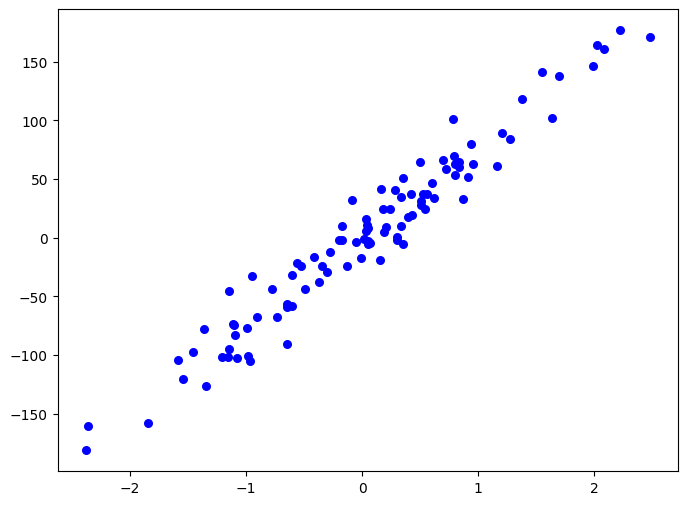

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from linear_regression import LinearRegression


X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

305.7719958301902


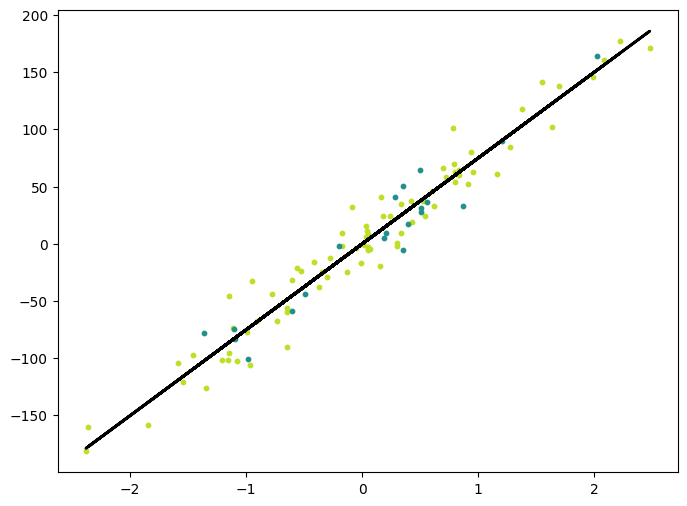

In [48]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()



---



## **Linear Regression with Multiple Variables**

In [51]:
#Import data
companies= pd.read_csv('/content/1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
companies.iloc[:,:4].head(3)

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida


In [52]:
#extract independent and dependent variables
x=companies.iloc[:,:-1].values
y=companies.iloc[:,4].values

In [ ]:
companies.drop('State', axis=1).head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<Axes: >

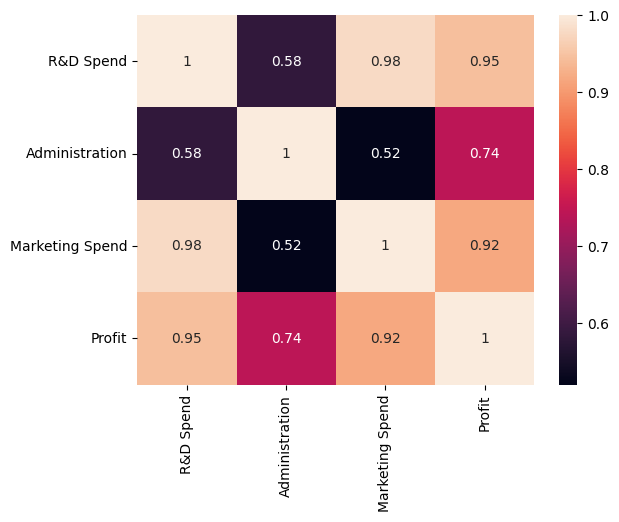

In [ ]:
#Building the corelaction matrix
sns.heatmap(companies.drop('State', axis=1).corr(),annot=True,)
#Profit has high corelation between RD Spending, less correclation between MS. and the least is Administration

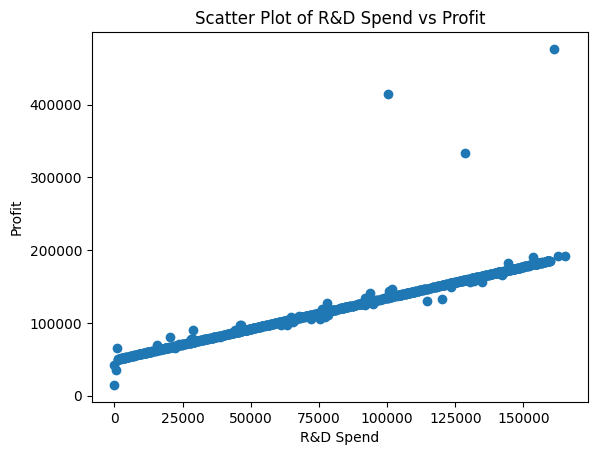

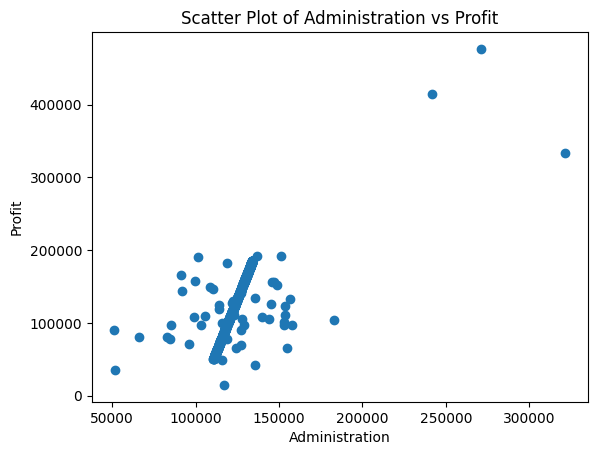

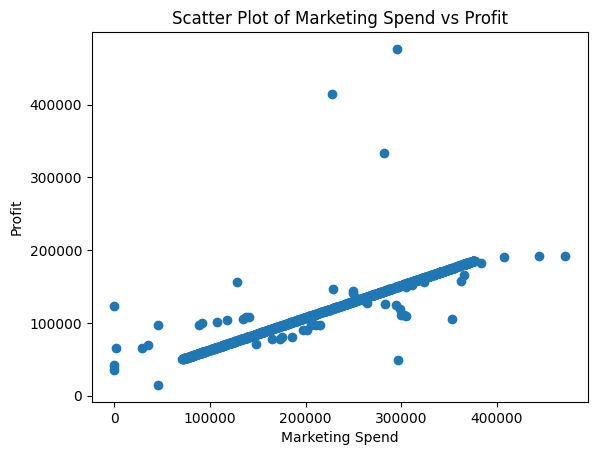

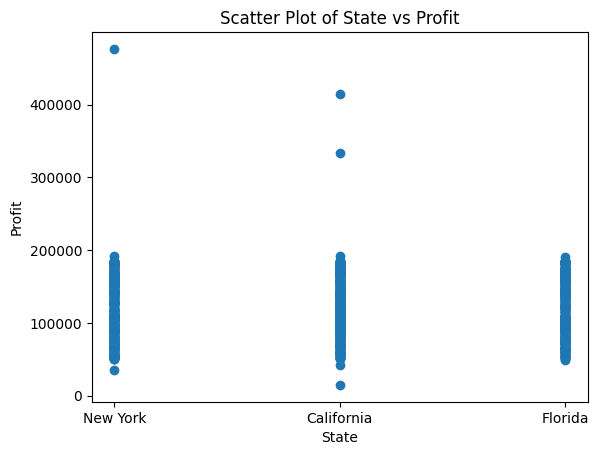

In [ ]:
for column in companies.columns:
    if column != 'Profit':
        plt.figure()  # Create a new figure for each plot
        plt.scatter(companies[column], companies['Profit'])
        plt.xlabel(column)
        plt.ylabel('Profit')
        plt.title(f'Scatter Plot of {column} vs Profit')
        plt.show()

In [ ]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 'State' is the categorical feature at index 3
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

# Create a ColumnTransformer to apply OneHotEncoder to the categorical feature
transformer = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), [3])],
    remainder='passthrough'  # Keep other columns unchanged
)

x = transformer.fit_transform(x)

In [ ]:
companies['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
feature_names = transformer.get_feature_names_out()

print(feature_names)

['onehot__x3_0' 'onehot__x3_1' 'onehot__x3_2' 'remainder__x0'
 'remainder__x1' 'remainder__x2']


In [ ]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [ ]:
#Splitting into the Train set and the Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Fitting Multiple Linear Regression to the train set
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Predicting the test results
y_pred= regressor.predict(x_test)
y_pred.shape

(200,)

In [ ]:
y_test.shape

(200,)

In [ ]:
y.shape

(1000,)

In [ ]:
#slope
print(regressor.coef_)

[ 5.26235224e+02 -3.54301375e+02 -1.71933849e+02  5.25845857e-01
  8.44390881e-01  1.07574255e-01]


In [ ]:
print(regressor.intercept_)

-51561.46494774471


In [ ]:
#Calculating the R squared value
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9112695892268727

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 192148061.81509575
RMSE: 13861.748151481319


R2 Score: suggesting a good fit of the model to the data.

Dependent variable (Profit)

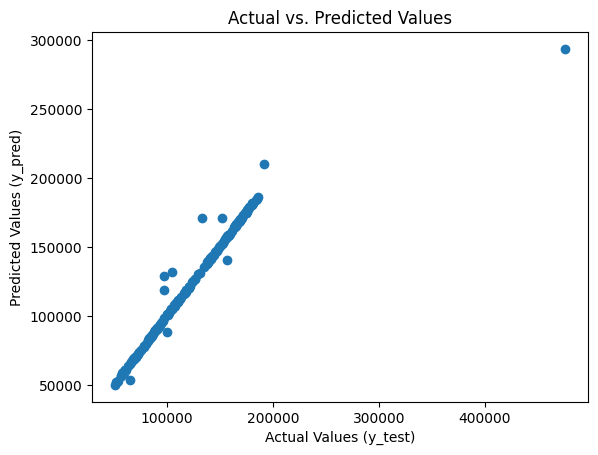

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.show()

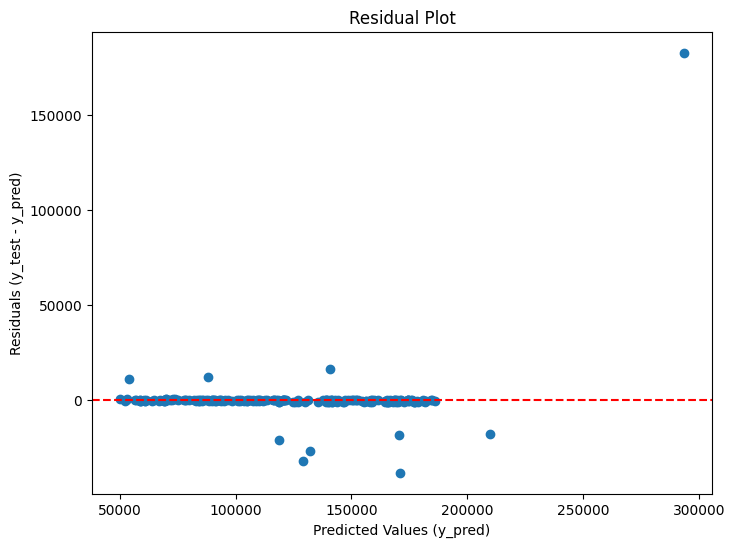

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.show()

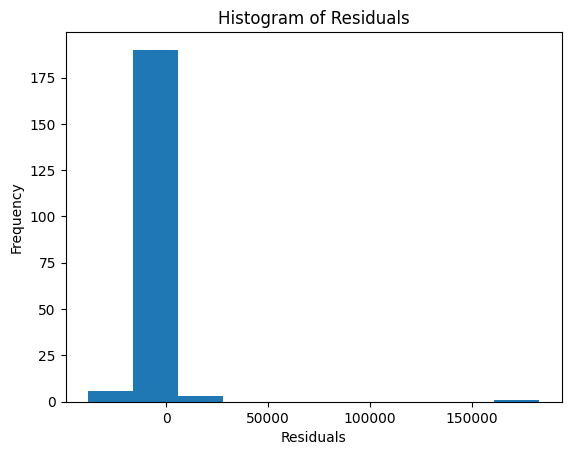

In [ ]:
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
# Assuming 'regressor' is your fitted LinearRegression model
coefficients = regressor.coef_

# Print coefficients for each state (adjust indices as needed)
print("Coefficient for California:", coefficients[0])
print("Coefficient for Florida:", coefficients[1])
print("Coefficient for New York:", coefficients[2])

Coefficient for California: 526.2352237455121
Coefficient for Florida: -354.3013746156143
Coefficient for New York: -171.93384913158667




---



## **Linear Regression with one variable from scratch**

In [55]:
#This model only valid for 1 variable Linear regression.
#I will choose RD as a variable, because it has the higheest corelation rate with Profit
x=companies.iloc[:,:1].values
y=companies.iloc[:,4].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

nan


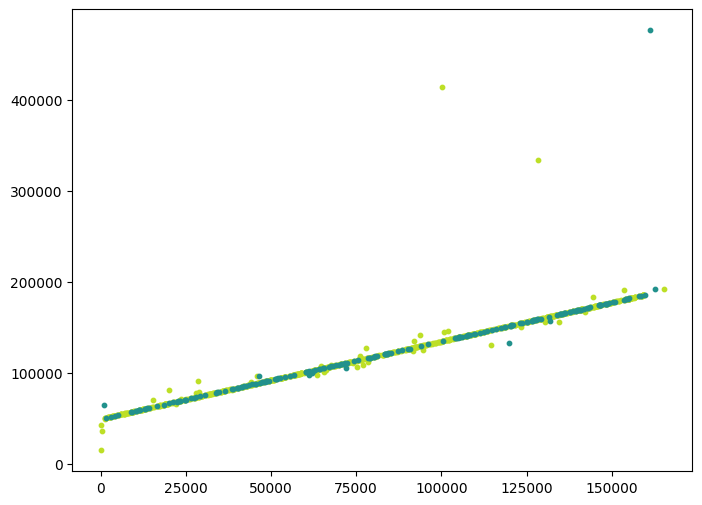

In [58]:
reg = LinearRegression(lr=0.001)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

In [83]:
import numpy as np

# Check for NaNs or Infs in your data
print(np.any(np.isnan(X_train)), np.any(np.isnan(y_train)))
print(np.any(np.isinf(X_train)), np.any(np.isinf(y_train)))
print(np.any(np.isnan(X_test)), np.any(np.isnan(y_test)))
print(np.any(np.isinf(X_test)), np.any(np.isinf(y_test)))


False False
False False
False False
False False


In [84]:
# Experiment with different learning rates and number of iterations
reg = LinearRegression(lr=0.01, n_iters=10000)
reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and predict with scaled data
reg = LinearRegression(lr=0.01, n_iters=10000)
reg.fit(X_train_scaled, y_train)
predictions = reg.predict(X_test_scaled)


In [86]:
def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
        y_pred = np.dot(X, self.weights) + self.bias
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        print(f"y_pred: {y_pred[:5]}")  # Print first few predictions
        print(f"dw: {dw}")
        print(f"db: {db}")

        self.weights -= self.lr * dw
        self.bias -= self.lr * db

        if np.any(np.isnan(self.weights)) or np.isnan(self.bias):
            print("NaNs detected in weights or bias")
            break


In [87]:
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

1.5261241245904173e+19


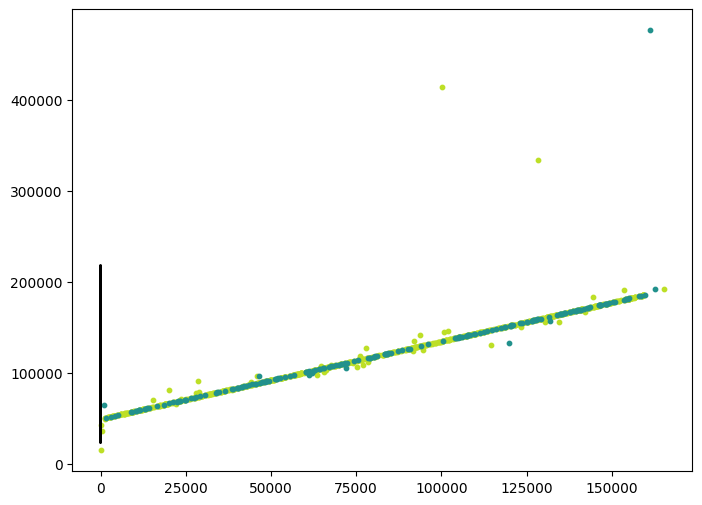

In [88]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()